In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
data = pd.read_csv("vgsale_1.csv")

# Вызвал сомнения столбец 'Year', выполню форматирование к int
print(data['Year'].apply(type).value_counts())
data["Year"] = data["Year"].fillna(0).astype(int)

Year
<class 'float'>    16598
Name: count, dtype: int64


In [50]:
# Проверка результата форматирования
print(data['Year'].apply(type).value_counts())

Year
<class 'int'>    16598
Name: count, dtype: int64


In [52]:
# создаю переменную без дубликатов данных столбца Name
games_per_year = data.drop_duplicates(subset=["Name"]).groupby("Year")["Name"].count()

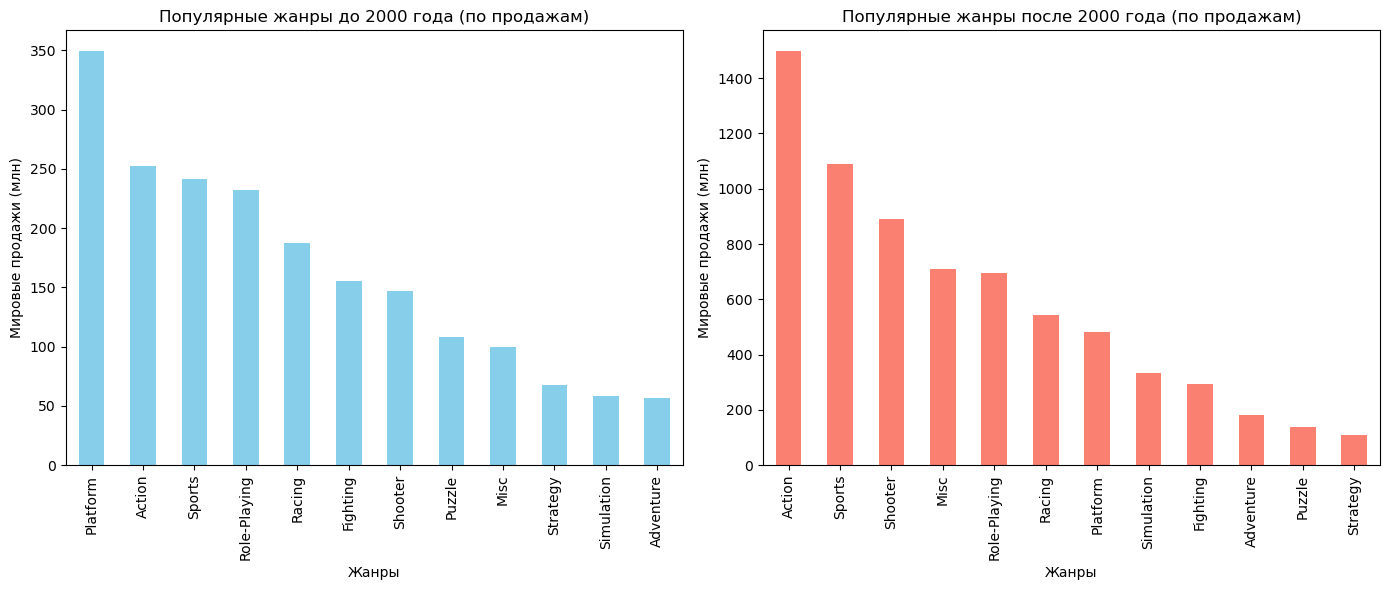

In [54]:
# divide data on two age
data_before_2000 = data[data['Year'] <= 2000]
data_after_2000 = data[data['Year'] > 2000]

# group by genres and sum sales
genre_sales_before_2000 = data_before_2000.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales_after_2000 = data_after_2000.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# build columns charts
plt.figure(figsize=(14, 6))

# chart for before 2000 age
plt.subplot(1, 2, 1)
genre_sales_before_2000.plot(kind='bar', color='skyblue')
plt.title('Популярные жанры до 2000 года (по продажам)')
plt.ylabel('Мировые продажи (млн)')
plt.xlabel('Жанры')

# chart for after 2000 age
plt.subplot(1, 2, 2)
genre_sales_after_2000.plot(kind='bar', color='salmon')
plt.title('Популярные жанры после 2000 года (по продажам)')
plt.ylabel('Мировые продажи (млн)')
plt.xlabel('Жанры')

plt.tight_layout()
plt.show()

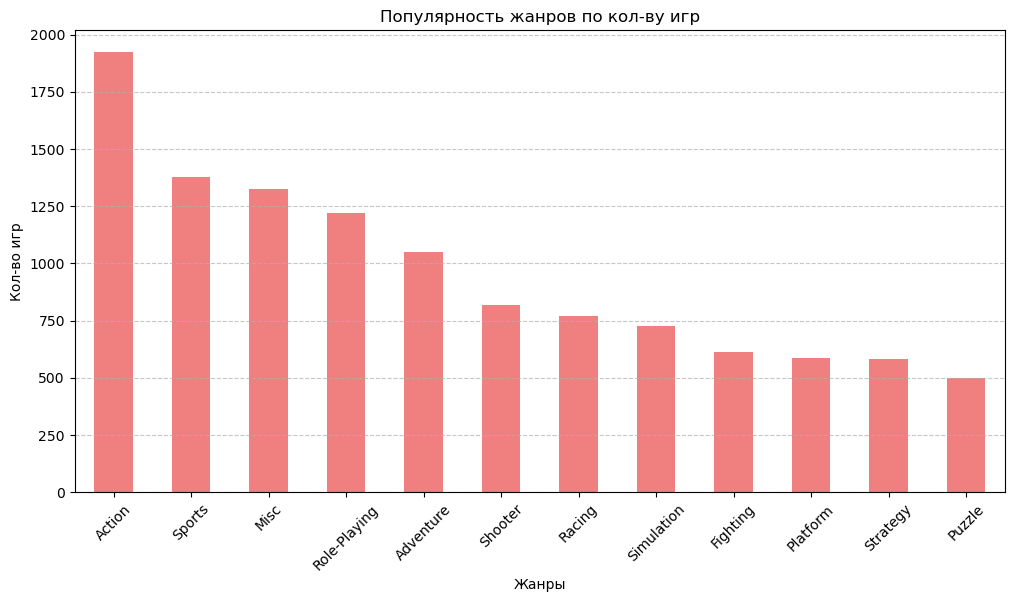

In [60]:
# Общее кол-во игр выпущенное по годам
# Строгое удаление дубликатов столбца Name
unique_games = data.drop_duplicates(subset=['Name'])

# Группировка и подсчет кол-ва игр по жанрам
genre_counts = unique_games['Genre'].value_counts()

# Строю график
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='lightcoral')

plt.title('Популярность жанров по кол-ву игр')
plt.xlabel('Жанры')
plt.ylabel('Кол-во игр')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

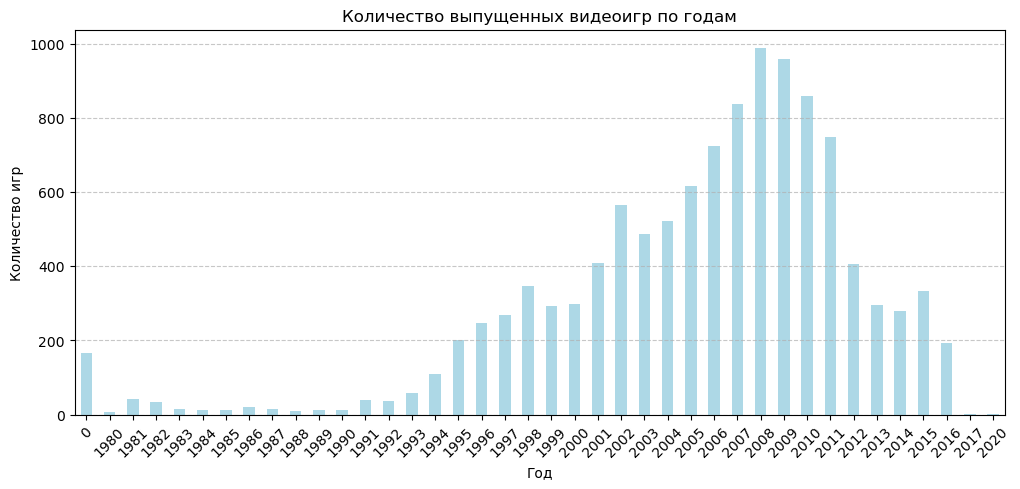

In [62]:
# 2 График: Количество видеоигр по годам (без дубликатов по Name)
plt.figure(figsize=(12, 5))
games_per_year.plot(kind="bar", color="lightblue")
plt.title("Количество выпущенных видеоигр по годам")
plt.ylabel("Количество игр")
plt.xlabel("Год")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Топ-3 издателя:
 Publisher
Electronic Arts       1351
Activision             975
Namco Bandai Games     932
Name: count, dtype: int64


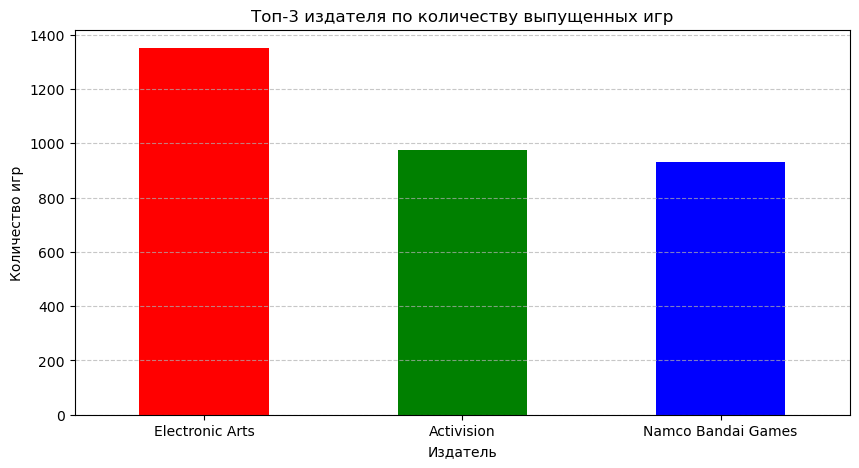

In [64]:
# 3 Топ-3 издателя по количеству выпущенных игр
top_publishers = data["Publisher"].value_counts().nlargest(3)  # Берём топ-3
print("Топ-3 издателя:\n", top_publishers)

# Визуализация топ-3 издателей
plt.figure(figsize=(10, 5))
top_publishers.plot(kind="bar", color=["red", "green", "blue"])
plt.title("Топ-3 издателя по количеству выпущенных игр")
plt.ylabel("Количество игр")
plt.xlabel("Издатель")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<Figure size 1200x600 with 0 Axes>

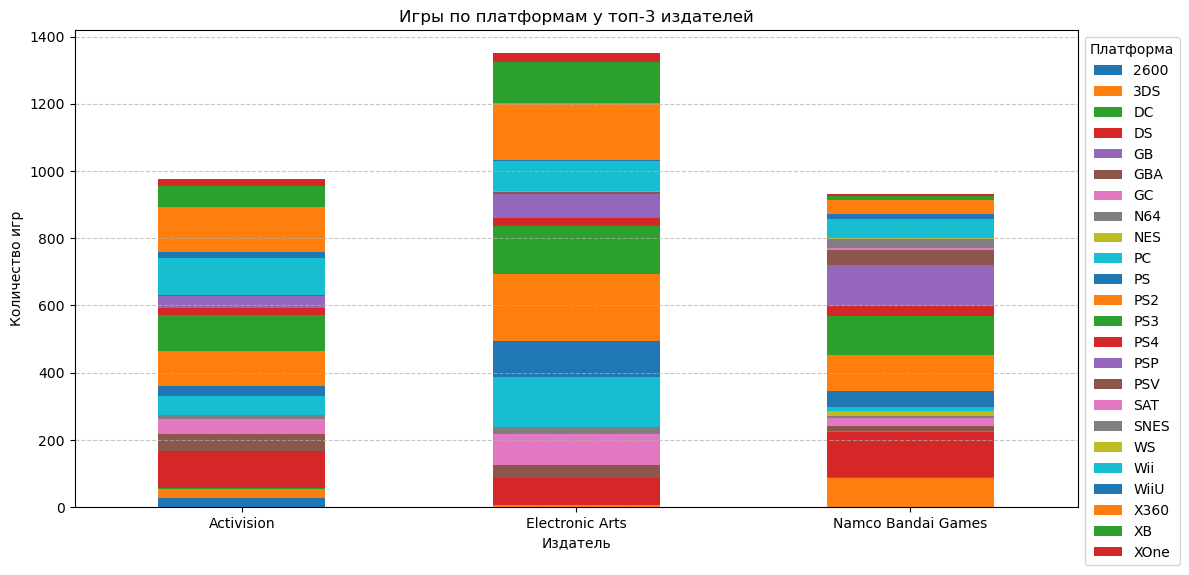

In [70]:
# 4 График: Количество игр топ-3 издателей по платформам
top_publisher_names = top_publishers.index
top_publisher_data = data[data["Publisher"].isin(top_publisher_names)]

plt.figure(figsize=(12, 6))
top_publisher_data.groupby(["Publisher", "Platform"])["Name"].count().unstack().plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Игры по платформам у топ-3 издателей")
plt.ylabel("Количество игр")
plt.xlabel("Издатель")
plt.xticks(rotation=0)
plt.legend(title="Платформа", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

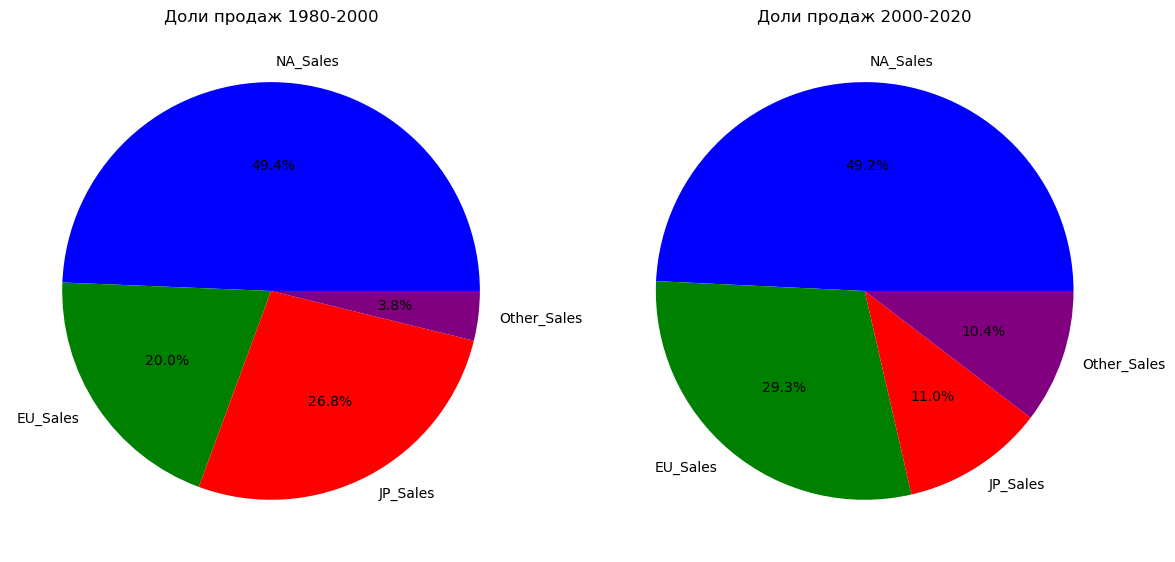

In [72]:
# 5 Круговые диаграммы долей продаж по регионам (1980-2000 и 2000-2020)
data_before_2000 = data[data['Year'] <= 2000]
data_after_2000 = data[data['Year'] > 2000]

sales_before_2000 = data_before_2000[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sales_after_2000 = data_after_2000[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(sales_before_2000, labels=sales_before_2000.index, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple'])
axes[0].set_title("Доли продаж 1980-2000")

axes[1].pie(sales_after_2000, labels=sales_after_2000.index, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple'])
axes[1].set_title("Доли продаж 2000-2020")

plt.tight_layout()
plt.show()